# Pandas 
> 판다스(Pandas)는 데이터프레임(DataFrame)과 시리즈(Series)라는 자료형과 데이터 분석을 위한 다양한 기능을 제공하는 파이썬 라이브러리를 말한다
>
> 판다스의 기초 개념을 정리하고 실습을 통해 판다스를 숙지한다

## Pandas 시작하기
> *빅데이터의 분석의 시작은 데이터 불러오기 부터*

* import pandas 명령어 사용하여 csv나 tsv의 데이터를 불러올 수 있다.
* 판다스에 있는 메서드를 호출하려면 pandas와 점(.) 연산자를 사용해야 한다

In [1]:
# 매번 pandas라고 입력하면 번거롭기 때문에 관습적으로 pandas를 pd로 줄여 사용

import pandas as pd
df = pd.read_csv('data_visual/gapminder.tsv', sep='\t')    # Load gapminder, 탭으로 구분

## 시리즈와 데이터프레임
* 데이터프레임 DataFrame : **엑셀에서 볼 수 있는 시트(Sheet)**와 동일한 개념
* 시리즈 Series : 시트의 **열 1개**를 의미
* read_csv(): 데이터 집합을 데이터프레임 자료형으로 변환한다.
* head() : 데이터프레임에서 가장 앞 5개의 행을 출력한다.
* tail() : 데이터프레임에서 가장 뒤 5개의 행을 출력한다.
* type() : 자료형을 출력한다.
    + 자료가 데이터프레임인지 확인 가능하다
* shape() : 행과 열의 크기를 출력한다.
* column() : 데이터프레임의 열 이름을 출력한다.


* csv : Comma-Separated Values. 콤마로 구분된 데이터
* tsv : Tab-Separated Values. 탭으로 구분된 데이터

In [2]:
print(df.head())    # df의 5개의 행 출력
print(type(df))     # df의 자료형 출력
print(df.shape)     # df의 행, 열의 크기 출력

       country continent  year  lifeExp       pop   gdpPercap
0  Afghanistan      Asia  1952   28.801   8425333  779.445314
1  Afghanistan      Asia  1957   30.332   9240934  820.853030
2  Afghanistan      Asia  1962   31.997  10267083  853.100710
3  Afghanistan      Asia  1967   34.020  11537966  836.197138
4  Afghanistan      Asia  1972   36.088  13079460  739.981106
<class 'pandas.core.frame.DataFrame'>
(1704, 6)


In [3]:
print(df.columns)     # Print column indices
print(df.dtypes)      # 데이터프레임을 구성하는 값의 자료형을 알려준다

Index(['country', 'continent', 'year', 'lifeExp', 'pop', 'gdpPercap'], dtype='object')
country       object
continent     object
year           int64
lifeExp      float64
pop            int64
gdpPercap    float64
dtype: object


In [4]:
print(df.info())     # 데이터프레임을 구성하는 값의 자료형을 알려준다 (dtype과 비슷)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1704 entries, 0 to 1703
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   country    1704 non-null   object 
 1   continent  1704 non-null   object 
 2   year       1704 non-null   int64  
 3   lifeExp    1704 non-null   float64
 4   pop        1704 non-null   int64  
 5   gdpPercap  1704 non-null   float64
dtypes: float64(2), int64(2), object(2)
memory usage: 80.0+ KB
None


### Pandas와 파이썬 자료형 비교
![dtype](https://user-images.githubusercontent.com/28593767/111310695-b9801380-86a0-11eb-9dd3-3c01828232fb.png)

## 데이터 추출하기

### 열 단위 데이터 추출하기
    new_df = df['column name']
    new_df2 = df[['column1 name', 'column2 name']]

* 1개의 열만 추출하면 시리즈 형태의 데이터를 얻을 수 있고 2개 이상의 열을 추출하면 데이터프레임을 얻을 수 있다.
* 2개 이상의 열을 추출할 때는 **배열 안에** 넣어야한다.
* 2개 이상의 열을 추출한 것은 보통 subset이라고 한다.

In [5]:
country_df = df['country']
test_df = df[['country', 'continent']]      # 대괄호 안에 배열 안에 인덱스를 넣음

print(type(country_df))       # 1개의 열만 추출하면 시리즈
print(type(test_df))          # 2개 이상의 열은 데이터프레임(subset)
print(country_df.head())
print(country_df.tail())

<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>
0    Afghanistan
1    Afghanistan
2    Afghanistan
3    Afghanistan
4    Afghanistan
Name: country, dtype: object
1699    Zimbabwe
1700    Zimbabwe
1701    Zimbabwe
1702    Zimbabwe
1703    Zimbabwe
Name: country, dtype: object


In [6]:
subset = df[['country', 'continent', 'year']]
print(type(subset))
print()
print(subset.head())
print(subset.tail())

<class 'pandas.core.frame.DataFrame'>

       country continent  year
0  Afghanistan      Asia  1952
1  Afghanistan      Asia  1957
2  Afghanistan      Asia  1962
3  Afghanistan      Asia  1967
4  Afghanistan      Asia  1972
       country continent  year
1699  Zimbabwe    Africa  1987
1700  Zimbabwe    Africa  1992
1701  Zimbabwe    Africa  1997
1702  Zimbabwe    Africa  2002
1703  Zimbabwe    Africa  2007


### 행 단위 데이터 추출하기
* 행 단위로 추출하려면 loc, iloc 속성을 사용해야 한다.
    + loc : 인덱스를 기준으로 행 데이터 추출
    + iloc: 행 번호를 기준으로 행 데이터 추출
* 일반적으로 프로그래밍에서 인덱스는 list같은 자료형에 저장된 데이터의 순서를 의미하지만, Pandas에서는 이러한 개념을 **행 번호**라고 부른다.
* 인덱스는 출력된 데이터 집합에 맨 왼쪽에 부여되는 번호이다. 일반적으로 0부터 시작하는 숫자이지만 행 데이터가 추가, 삭제되면 변할 수 있고 숫자 대신 문자열을 사용할 수도 있다. 
    + 예를 들어 first, second, third같은 문자열로도 지정할 수 있다.
* 즉, 행 번호는 데이터의 순서를 따라가기 때문에 실제 데이터프레임에서는 확인할 수 없는 값이다.
* loc에 비해 iloc는 데이터가 커질수록 정확한 데이터를 알기 어렵다는 단점이 있어 현업에서 덜 쓰인다.

```
    df.loc[index]
    df.loc[[index1, index2, index3]]
```    

In [7]:
# loc에 인덱스 번호를 넣으면 원하는 행 데이터를 추출 가능 

print(df.loc[0])      # Index 0 데이터
print(df.loc[99])     # Index 99 데이터
print(df.loc[[0, 10, 100]])    # Index 0, 10, 100 데이터

country      Afghanistan
continent           Asia
year                1952
lifeExp           28.801
pop              8425333
gdpPercap        779.445
Name: 0, dtype: object
country      Bangladesh
continent          Asia
year               1967
lifeExp          43.453
pop            62821884
gdpPercap       721.186
Name: 99, dtype: object
         country continent  year  lifeExp       pop   gdpPercap
0    Afghanistan      Asia  1952   28.801   8425333  779.445314
10   Afghanistan      Asia  2002   42.129  25268405  726.734055
100   Bangladesh      Asia  1972   45.252  70759295  630.233627


### 데이터 슬라이싱
* 추출할 데이터의 행과 열을 지정하는 것을 슬라이싱이라 한다.
* 슬라이싱에는 슬라이싱 구문을 사용하는 방법과 range 메서드를 사용하는 방법이 있다.
* 일반적으로 슬라이싱 구문이 더 많이 쓰인다.

#### 슬라이싱 구문
```python
    subset = df.loc[[row], [col]]
    subset = df.iloc[[row], [col]]
```

In [8]:
# 데이터 슬라이싱 기법
# 특정 데이터끼리 비교할 때 많이 쓰임

# year, pop 행만 출력
subset = df.loc[:,['year', 'pop']]
print(subset.head())

   year       pop
0  1952   8425333
1  1957   9240934
2  1962  10267083
3  1967  11537966
4  1972  13079460


In [9]:
# 3개 column 만 출력
subset = df.iloc[:,:3]
print(subset.head())

# 0부터 6까지 2개 단위 column만 출력
subset = df.iloc[:,0:6:2]
print(subset.head())

       country continent  year
0  Afghanistan      Asia  1952
1  Afghanistan      Asia  1957
2  Afghanistan      Asia  1962
3  Afghanistan      Asia  1967
4  Afghanistan      Asia  1972
       country  year       pop
0  Afghanistan  1952   8425333
1  Afghanistan  1957   9240934
2  Afghanistan  1962  10267083
3  Afghanistan  1967  11537966
4  Afghanistan  1972  13079460


In [10]:
subset = df.iloc[[0,99,999],[0,3,5]]
print(subset)

         country  lifeExp    gdpPercap
0    Afghanistan   28.801   779.445314
99    Bangladesh   43.453   721.186086
999     Mongolia   51.253  1226.041130


In [11]:
# 10~13행과 year, pop, lifeExp의 열 출력
print(df.loc[10:13, ['year','pop','lifeExp']])

    year       pop  lifeExp
10  2002  25268405   42.129
11  2007  31889923   43.828
12  1952   1282697   55.230
13  1957   1476505   59.280


#### range 메서드
```python
    small_range = list(range(n))
    subset = df.iloc[[row], small_range]
```

* range()는 제너레이터를 반환한다. 
* 따라서 iloc에 쓰기 위해서는 리스트로 변환해야 한다.
* list(range(n))

In [12]:
small_range = list(range(3,6))   # range를 list로 변환
print(small_range)
print(type(small_range))         # 이제 자료형이 list로 나온다

subset= df.iloc[:,small_range]   # range를 사용해 슬라이싱
print(subset.head())

[3, 4, 5]
<class 'list'>
   lifeExp       pop   gdpPercap
0   28.801   8425333  779.445314
1   30.332   9240934  820.853030
2   31.997  10267083  853.100710
3   34.020  11537966  836.197138
4   36.088  13079460  739.981106


## 데이터 그룹화
* groupby() 명령어를 이용해 괄호 안에 그룹화 하고싶은 열을 넣어 데이터를 그룹핑 할 수 있다.
* 그룹화한 데이터프레임에서 특정 1개의 열만 추출하면 그룹화한 시리즈를 얻을 수 있다.
* nunique() 명령어를 이용해 그룹화한 데이터의 빈도수를 알 수 있다.

```
    groupby_df = df.groupby(col)
    groupby_df.nunique()
    groupby_df[col].nunique()
```    

In [13]:
# 연도별 평균 인구수와 평균 1인당 gdp
print(df.groupby('year')[['pop', 'gdpPercap']].mean())
print(df.groupby('year').nunique())

               pop     gdpPercap
year                            
1952  1.695040e+07   3725.276046
1957  1.876341e+07   4299.408345
1962  2.042101e+07   4725.812342
1967  2.265830e+07   5483.653047
1972  2.518998e+07   6770.082815
1977  2.767638e+07   7313.166421
1982  3.020730e+07   7518.901673
1987  3.303857e+07   7900.920218
1992  3.599092e+07   8158.608521
1997  3.883947e+07   9090.175363
2002  4.145759e+07   9917.848365
2007  4.402122e+07  11680.071820
      country  continent  lifeExp  pop  gdpPercap
year                                             
1952      142          5      142  142        142
1957      142          5      142  142        142
1962      142          5      141  142        142
1967      142          5      141  142        142
1972      142          5      142  142        142
1977      142          5      142  142        142
1982      142          5      142  142        142
1987      142          5      141  142        142
1992      142          5      141  142

In [14]:
# 연도별 평균 기대수명

# year로 그룹화하고 그 데이터에서 lifeExp열을 지정하여 mean() 매서드로 평균을 구한다.
print(df.groupby('year')['lifeExp'].mean())

year
1952    49.057620
1957    51.507401
1962    53.609249
1967    55.678290
1972    57.647386
1977    59.570157
1982    61.533197
1987    63.212613
1992    64.160338
1997    65.014676
2002    65.694923
2007    67.007423
Name: lifeExp, dtype: float64


In [15]:
# year과 contient 기준으로 그룹화하고 각 lifeExp, gdpPercap의 평균을 구한다.
multi_group_var = df.groupby(['year', 'continent'])[['lifeExp', 'gdpPercap']].mean()
print(multi_group_var)


# 그룹화된 데이터에서 lifeExp만 추출하여 만든 그룹화된 시리즈
multi_group_var_lifeExp = multi_group_var['lifeExp']
print(multi_group_var_lifeExp.head())

                  lifeExp     gdpPercap
year continent                         
1952 Africa     39.135500   1252.572466
     Americas   53.279840   4079.062552
     Asia       46.314394   5195.484004
     Europe     64.408500   5661.057435
     Oceania    69.255000  10298.085650
1957 Africa     41.266346   1385.236062
     Americas   55.960280   4616.043733
     Asia       49.318544   5787.732940
     Europe     66.703067   6963.012816
     Oceania    70.295000  11598.522455
1962 Africa     43.319442   1598.078825
     Americas   58.398760   4901.541870
     Asia       51.563223   5729.369625
     Europe     68.539233   8365.486814
     Oceania    71.085000  12696.452430
1967 Africa     45.334538   2050.363801
     Americas   60.410920   5668.253496
     Asia       54.663640   5971.173374
     Europe     69.737600  10143.823757
     Oceania    71.310000  14495.021790
1972 Africa     47.450942   2339.615674
     Americas   62.394920   6491.334139
     Asia       57.319269   8187.468699


In [16]:
# nunique() : 그룹화한 데이터의 개수, 빈도수를 출력

# continent를 기준으로 데이터프레임을 만들고 country 열만 추출해서 데이터의 빈도수를 계산
print(df.groupby(['continent'])[['country']].nunique())

           country
continent         
Africa          52
Americas        25
Asia            33
Europe          30
Oceania          2


### 데이터의 시각화
* 데이터의 분석 과정에서 가장 중요한 요소이다.
* 데이터를 시각화하면 데이터를 이해하거나 추이를 파악하는 등의 작업을 할 때 도움이 된다.
* matplotlib을 이용하면 간단하게 그래프를 그릴 수 있다.


year
1952    49.057620
1957    51.507401
1962    53.609249
1967    55.678290
1972    57.647386
1977    59.570157
1982    61.533197
1987    63.212613
1992    64.160338
1997    65.014676
2002    65.694923
2007    67.007423
Name: lifeExp, dtype: float64


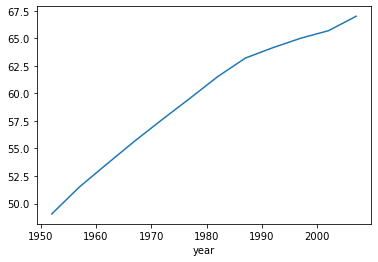

In [17]:
# matplotlib을 이용해서 데이터의 시각화를 할 수 있다.

import matplotlib.pyplot as plt

global_yearly_life_expectancy = df.groupby('year')['lifeExp'].mean()
print(global_yearly_life_expectancy)

global_yearly_life_expectancy.plot()
plt.show()

### 시리즈 속성과 메서드 - index, values, keys

* 시리즈에는 loc, iloc 이외에도 다양한 속성이 미리 정의되어 있다.
* index 속성 : 시리즈의 인덱스가 들어있다.
* values 속성 : 시리즈의 데이터가 저장되어 있다.
* keys() 메서드 : index 속성과 같은 역할을 한다.

![series](https://user-images.githubusercontent.com/28593767/111479198-18fb2380-8774-11eb-8457-1a4f91b1c86e.png)


* 시리즈에는 기초 통계 메서드도 미리 정의되어 있다.
* mean(), max(), min(), std()

##  Boolean 추출
* 일반적으로 추출을 할 데이터의 정확한 인덱스를 모르는 경우가 더 많다. 이런 경우에 사용하는 방법이 boolean 추출이다.
* Boolean 추출은 **특정 조건을 만족하는 값만 추출**할 수 있다.

In [18]:
scientists = pd.read_csv('data_visual/scientists.csv')     # csv파일이라 tab 인자값 필요 없음
print(scientists.head())

ages = scientists['Age']
print(ages.max())
print(ages.min())
print(ages.mean())
print(ages.std())

# 조건식에 대한 참, 거짓 출력
print(ages>ages.mean())

# 평균 나이보다 많은 나이만 출력 (참인 데이터만 출력)
print(ages[ages>ages.mean()])

                   Name        Born        Died  Age    Occupation
0     Rosaline Franklin  1920-07-25  1958-04-16   37       Chemist
1        William Gosset  1876-06-13  1937-10-16   61  Statistician
2  Florence Nightingale  1820-05-12  1910-08-13   90         Nurse
3           Marie Curie  1867-11-07  1934-07-04   66       Chemist
4         Rachel Carson  1907-05-27  1964-04-14   56     Biologist
90
37
59.125
18.325918413937288
0    False
1     True
2     True
3     True
4    False
5    False
6    False
7     True
Name: Age, dtype: bool
1    61
2    90
3    66
7    77
Name: Age, dtype: int64


### 브로드캐스팅 Broadcasting

* 시리즈나 데이터프레임에 있는 **모든 데이터에 대해 한 번에 연산**하는 것을 **브로드캐스팅(Broadcasting)**이라고 한다. 
* 또한 시리즈처럼 여러 개의 값을 가진 데이터를 **벡터**라고 하고 단순 크기를 나타내는 데이터를 **스칼라**라고 한다. 
* 같은 길이의 벡터끼리 연산하면 같은 길이의 벡터가 출력된다.
* 벡터에 스칼라를 연산하면 벡터의 모든 값에 스칼라를 적용하여 브로드캐스팅한 결과가 나온다.
* 길이가 다른 벡터를 연산하면 **같은 인덱스의 값만 계산하고 나머지는 누락값(NaN)으로 처리**한다.
* 벡터와 벡터의 연산은 **일치하는 인덱스의 값 끼리** 수행하게 된다.

In [19]:
# 같은 길이의 벡터끼리 연산
print(ages + ages)

# 벡터에 스칼라 연산
print(ages * 2)

# 다른 길이의 벡터끼리 연산
new_series = pd.Series([10, 20, 30, 40])     # 임의의 새 series 생성
print(ages + new_series)

0     74
1    122
2    180
3    132
4    112
5     90
6     82
7    154
Name: Age, dtype: int64
0     74
1    122
2    180
3    132
4    112
5     90
6     82
7    154
Name: Age, dtype: int64
0     47.0
1     81.0
2    120.0
3    106.0
4      NaN
5      NaN
6      NaN
7      NaN
dtype: float64


In [20]:
# 기존 인덱스 순서 데이터
print(ages)

# 인덱스 역순으로 데이터 정렬
rev_ages = ages.sort_index(ascending=False)
print(rev_ages)

# 기존 데이터를 두 번 더한 값과 역순과 합한 값 모두 일치
# 즉 인덱스가 일치하는 값끼리 연산했음을 알 수 있다
print(ages*2)
print(ages + rev_ages)

0    37
1    61
2    90
3    66
4    56
5    45
6    41
7    77
Name: Age, dtype: int64
7    77
6    41
5    45
4    56
3    66
2    90
1    61
0    37
Name: Age, dtype: int64
0     74
1    122
2    180
3    132
4    112
5     90
6     82
7    154
Name: Age, dtype: int64
0     74
1    122
2    180
3    132
4    112
5     90
6     82
7    154
Name: Age, dtype: int64


### 데이터프레임의 Boolean 추출과 브로드캐스팅

* 시리즈와 마찬가지로 데이터프레임도 boolean 추출과 브로드캐스팅이 가능하다.
* 데이터프레임에서 boolean 추출을 하기 위해서는 특정 열을 지정해 조건문을 입력하면 된다.
* 데이터프레임에서 스칼라 연산을 적용하면 모든 요소에 스칼라를 적용하여 연산한다. 
    + 만약 2를 곱하면 정수 데이터는 2를 곱한 수가 되고 문자열 데이터는 2배로 늘어난다.

In [21]:
# 데이터프레임 boolean 추출

# 데이터프레임의 Age 열에서 평균보다 높은 행만 출력
print(scientists[scientists['Age']> scientists['Age'].mean()])

                   Name        Born        Died  Age     Occupation
1        William Gosset  1876-06-13  1937-10-16   61   Statistician
2  Florence Nightingale  1820-05-12  1910-08-13   90          Nurse
3           Marie Curie  1867-11-07  1934-07-04   66        Chemist
7          Johann Gauss  1777-04-30  1855-02-23   77  Mathematician


In [22]:
# 데이터프레임 브로드캐스팅

# 데이터프레임에 스칼라 연산
print(scientists*2)

                                       Name                  Born  \
0        Rosaline FranklinRosaline Franklin  1920-07-251920-07-25   
1              William GossetWilliam Gosset  1876-06-131876-06-13   
2  Florence NightingaleFlorence Nightingale  1820-05-121820-05-12   
3                    Marie CurieMarie Curie  1867-11-071867-11-07   
4                Rachel CarsonRachel Carson  1907-05-271907-05-27   
5                        John SnowJohn Snow  1813-03-151813-03-15   
6                    Alan TuringAlan Turing  1912-06-231912-06-23   
7                  Johann GaussJohann Gauss  1777-04-301777-04-30   

                   Died  Age                            Occupation  
0  1958-04-161958-04-16   74                        ChemistChemist  
1  1937-10-161937-10-16  122              StatisticianStatistician  
2  1910-08-131910-08-13  180                            NurseNurse  
3  1934-07-041934-07-04  132                        ChemistChemist  
4  1964-04-141964-04-14  112     

## 데이터 처리하기
> 새로운 데이터 열을 추가하거나 문자열 날짜를 datetime 자료형으로 바꿀 수 있다.

In [23]:
print(scientists.shape)    # 기존 데이터프레임 (8,5)

# 기존 Born과 Died열의 자료형은 문자열(오브젝트)
print(scientists['Born'].dtype) 
print(scientists['Died'].dtype)

# Born과 Died를 datetime 자료형으로 변경
# format 속성을 ‘%Y-%m-%d’로 지정하여 날짜 형식을 지정
born_datetime = pd.to_datetime(scientists['Born'],format = '%Y-%m-%d') 
print(born_datetime)
died_datetime = pd.to_datetime(scientists['Died'],format = '%Y-%m-%d') 
print(died_datetime)

# born_dt, died_dt datetime 자료형 추가
scientists['born_dt'], scientists['died_dt'] = (born_datetime, died_datetime) 
print(scientists.head())

scientists['age_days_dt'] = (scientists['died_dt'] - scientists['born_dt']) 
print(scientists)
print(scientists.shape)    # 데이터프레임이 (8,5)에서 (8,8)로 2개의 열이 추가됨

(8, 5)
object
object
0   1920-07-25
1   1876-06-13
2   1820-05-12
3   1867-11-07
4   1907-05-27
5   1813-03-15
6   1912-06-23
7   1777-04-30
Name: Born, dtype: datetime64[ns]
0   1958-04-16
1   1937-10-16
2   1910-08-13
3   1934-07-04
4   1964-04-14
5   1858-06-16
6   1954-06-07
7   1855-02-23
Name: Died, dtype: datetime64[ns]
                   Name        Born        Died  Age    Occupation    born_dt  \
0     Rosaline Franklin  1920-07-25  1958-04-16   37       Chemist 1920-07-25   
1        William Gosset  1876-06-13  1937-10-16   61  Statistician 1876-06-13   
2  Florence Nightingale  1820-05-12  1910-08-13   90         Nurse 1820-05-12   
3           Marie Curie  1867-11-07  1934-07-04   66       Chemist 1867-11-07   
4         Rachel Carson  1907-05-27  1964-04-14   56     Biologist 1907-05-27   

     died_dt  
0 1958-04-16  
1 1937-10-16  
2 1910-08-13  
3 1934-07-04  
4 1964-04-14  
                   Name        Born        Died  Age          Occupation  \
0     Rosaline Fra

In [24]:
# 데이터프레임 섞어주기

# random 라이브러리
import random

# seed()는 컴퓨터가 생성하는 난수의 기준값을 정하기 위해 사용
# 일반적으로 같은 프로젝트에서 실험할 때는 같은 난수값을 사용한다
random.seed(42) 

# shuffle()을 이용해서 데이터를 섞어준다
scientists_copy = scientists.copy()
random.shuffle(scientists_copy['Age']) 
print(scientists_copy['Age'])

0    66
1    56
2    41
3    77
4    90
5    45
6    37
7    61
Name: Age, dtype: int64


/opt/anaconda3/lib/python3.8/random.py:307: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x[i], x[j] = x[j], x[i]


> copy(): 데이터프레임의 복사본을 만들어준다. 
> a = b는 원본 데이터가 변하면 똑같이 변하는 **얕은 복사**인 반면,
> pandas.DataFrame.copy는 복사 당시의 데이터프레임 상태만 복사되는 **깊은 복사**이다.
> 얕은 복사를 하면 복사본은 원본과 데이터/index를 공유하지만, 깊은 복사는 복사본이 자신만의 데이터/index를 갖게한다. 

In [25]:
# 데이터프레임 열 삭제하기
# drop()을 이용해서 데이터프레임에서 열을 삭제할 수 있다
# axis = 0 : x축, axis = 1 : y축, axis = 2 : z축

# 현재 열 전부 출력
print(scientists.columns)

# Age 열 삭제
scientists_dropped = scientists.drop(['Age'], axis = 1) 
print(scientists_dropped.columns)

# 1~4번 행 번호 삭제
scientists_dropped_row = scientists.drop(range(1,4), axis = 0)
print(scientists_dropped_row)

Index(['Name', 'Born', 'Died', 'Age', 'Occupation', 'born_dt', 'died_dt',
       'age_days_dt'],
      dtype='object')
Index(['Name', 'Born', 'Died', 'Occupation', 'born_dt', 'died_dt',
       'age_days_dt'],
      dtype='object')
                Name        Born        Died  Age          Occupation  \
0  Rosaline Franklin  1920-07-25  1958-04-16   37             Chemist   
4      Rachel Carson  1907-05-27  1964-04-14   56           Biologist   
5          John Snow  1813-03-15  1858-06-16   45           Physician   
6        Alan Turing  1912-06-23  1954-06-07   41  Computer Scientist   
7       Johann Gauss  1777-04-30  1855-02-23   77       Mathematician   

     born_dt    died_dt age_days_dt  
0 1920-07-25 1958-04-16  13779 days  
4 1907-05-27 1964-04-14  20777 days  
5 1813-03-15 1858-06-16  16529 days  
6 1912-06-23 1954-06-07  15324 days  
7 1777-04-30 1855-02-23  28422 days  


### 데이터 저장하기
> to_csv()을 이용해 CSV로 저장하거나 sep 인자를 추가하여 '\t'을 지정하고 파일 확장자를 .tsv로 지정하면 TSV 파일로 저장할 수 있다.
>
> xlwt 라이브러리가 있으면 엑셀 파일로 저장할 수도 있다.

```
    data_file.to_csv('../data_file.csv')
    data_file.to_csv('../data_file.tsv',sep='\t')
```

In [26]:
scientists_randAge = scientists
print(scientists_randAge)

                   Name        Born        Died  Age          Occupation  \
0     Rosaline Franklin  1920-07-25  1958-04-16   37             Chemist   
1        William Gosset  1876-06-13  1937-10-16   61        Statistician   
2  Florence Nightingale  1820-05-12  1910-08-13   90               Nurse   
3           Marie Curie  1867-11-07  1934-07-04   66             Chemist   
4         Rachel Carson  1907-05-27  1964-04-14   56           Biologist   
5             John Snow  1813-03-15  1858-06-16   45           Physician   
6           Alan Turing  1912-06-23  1954-06-07   41  Computer Scientist   
7          Johann Gauss  1777-04-30  1855-02-23   77       Mathematician   

     born_dt    died_dt age_days_dt  
0 1920-07-25 1958-04-16  13779 days  
1 1876-06-13 1937-10-16  22404 days  
2 1820-05-12 1910-08-13  32964 days  
3 1867-11-07 1934-07-04  24345 days  
4 1907-05-27 1964-04-14  20777 days  
5 1813-03-15 1858-06-16  16529 days  
6 1912-06-23 1954-06-07  15324 days  
7 1777-04-3